In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Embedding, Dense, SimpleRNN

In [ ]:
(X_train, y_train),(X_test, y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(25000,)

In [ ]:
from keras.utils import pad_sequences

In [ ]:
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post')

In [ ]:
vocab_size = max(max(seq) for seq in X_train) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 88587


In [ ]:
X_train.shape

(25000, 200)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,2))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.build(input_shape=(None, maxlen))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 2)              │         177,174 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,327 (696.59 KB)

 Trainable params: 178,327 (696.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
h1 = model.fit(X_train, y_train, epochs = 10, validation_data=(X_test,y_test), callbacks=[checkpoint])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4994 - loss: 0.6937
Epoch 1: val_accuracy improved from -inf to 0.52572, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.4994 - loss: 0.6937 - val_accuracy: 0.5257 - val_loss: 0.6881
Epoch 2/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5694 - loss: 0.6708
Epoch 2: val_accuracy improved from 0.52572 to 0.57764, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5694 - loss: 0.6708 - val_accuracy: 0.5776 - val_loss: 0.6909
Epoch 3/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6121 - loss: 0.6382
Epoch 3: val_accuracy did not improve from 0.57764
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6121 - loss: 0.6383 - val_accuracy: 0.5506 - val_loss: 0.6695
Epoch 4/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6168 - loss: 0.6115
Epoch 4: val_accuracy did not improve from 0.57764
782/782 ━━━━━━━━━━

In [ ]:
best_model = load_model("best_model.keras")

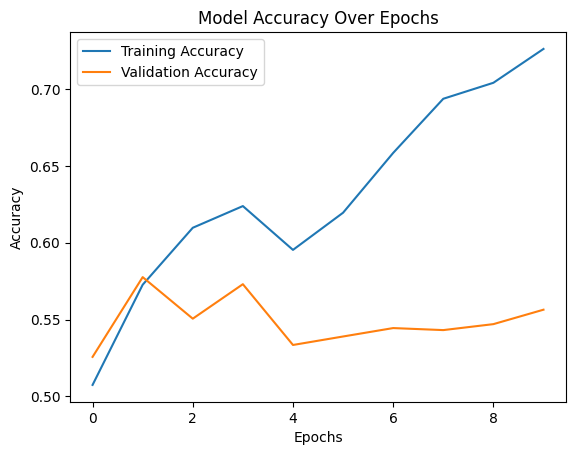

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h1.history['accuracy'], label='Training Accuracy')
plt.plot(h1.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred_labels = (y_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_labels)
print("Sklearn Accuracy:", accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Sklearn Accuracy: 0.55644
